# TP2 Deep Learning DNN FCNN : 
> Ce TP est effectué par :
**Sandra Mourali**- **Anas Chaibi** - **Salma Ghabri** - **Aziz Bellaaj** - **Louay Badri**
---

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-06-16 21:07:50.905711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 21:07:51.966832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# I. Classification binaire 
## 1. Dataset 
Nous allons créer un dataset pour simuler un problème de classification binaire. La
bibliothèque Scikit-Learn nous permet de créer des données binaire à l’aide de la
méthode make circles().

In [2]:
# Création du jeu de données avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

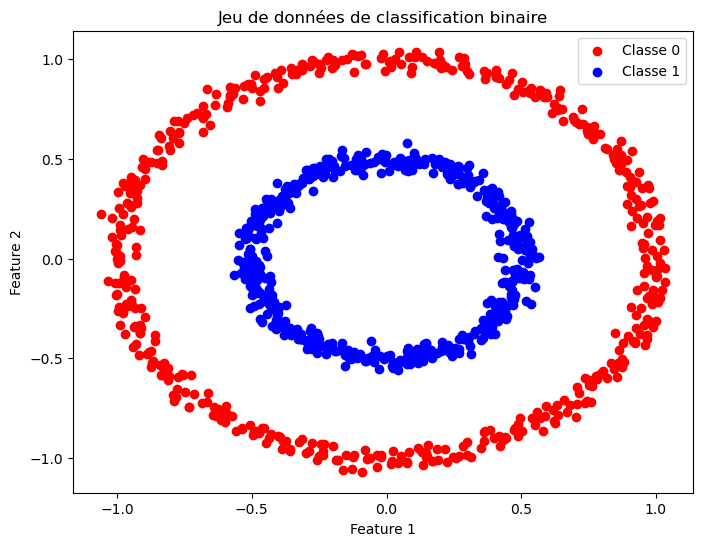

Dimensions du jeu de données X : (1000, 2)
Dimensions du jeu de données y : (1000,)


In [3]:
# Création du jeu de données avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42, factor=0.5)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Classe 1")
plt.title("Jeu de données de classification binaire")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Affichage des dimensions du jeu de données
print("Dimensions du jeu de données X :", X.shape)
print("Dimensions du jeu de données y :", y.shape)

Ce dataset nécessite une fonction non linéaire pour séparer ses classes. Les données générées par la méthode make_circles() sont arrangées en deux cercles concentriques. Il n'est pas possible de séparer linéairement ces deux classes à l'aide d'une seule ligne droite. Une frontière de décision non linéaire, telle qu'un cercle, serait nécessaire pour séparer efficacement les classes dans cet ensemble de données.

In [4]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


# 2. Définition du modèle
## 2.1 Cycle de vie d’un modèle :

Un modèle a un cycle de vie. Les cinq étapes du cycle de vie sont les suivantes :
1. Définir le modèle
2. Compiler le modèle
3. Entrainer le modèle
4. Évaluer le modèle
5. Faire des prédictions

In [5]:
def visualize(model, X_train, y_train):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédire les étiquettes pour chaque point dans la grille
    # Prédire les probabilités pour chaque point dans la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convertir les probabilités en classes (0 ou 1)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Tracer les frontières de décision
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Tracer les points d'entraînement
    plt.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors="k"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Frontières de décision pour les ensembles d’entraînement et de test")
    plt.show()

## Définition du modèle FCNN :


In [6]:
# Création du modèle séquentiel
model = Sequential()
model.add(Dense(5, activation="sigmoid", input_shape=(2,)))
model.summary()

/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-16 21:07:53.346202: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:07:53.637443: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:07:53.637559: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

## 2.3 Compilation du modèle : 

In [7]:
model.compile(loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"])

In [8]:
model = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(5, activation="sigmoid", input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model.add(Dense(1, activation="sigmoid"))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model.compile(loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"])

# Entraînement du modèle
history = model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/100


I0000 00:00:1718568474.469879  106294 service.cc:145] XLA service 0x7f44d4005c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718568474.469919  106294 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-16 21:07:54.485685: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-16 21:07:54.581090: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 1/25 ━━━━━━━━━━━━━━━━━━━━ 18s 788ms/step - accuracy: 0.5000 - loss: 0.7265

I0000 00:00:1718568475.017891  106294 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5199 - loss: 0.7107 - val_accuracy: 0.5000 - val_loss: 0.7149
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.7095 - val_accuracy: 0.5000 - val_loss: 0.7110
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4918 - loss: 0.7057 - val_accuracy: 0.5000 - val_loss: 0.7081
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 0.6978 - val_accuracy: 0.4850 - val_loss: 0.7060
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 0.7019 - val_accuracy: 0.4050 - val_loss: 0.7044
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4114 - loss: 0.6996 - val_accuracy: 0.3750 - val_loss: 0.7032
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4046 - loss: 0.6961 - val_accuracy: 0.3550 - val_loss: 0.7023
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 0.6965 - val_accuracy: 0.3300 - val_loss: 0.

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step


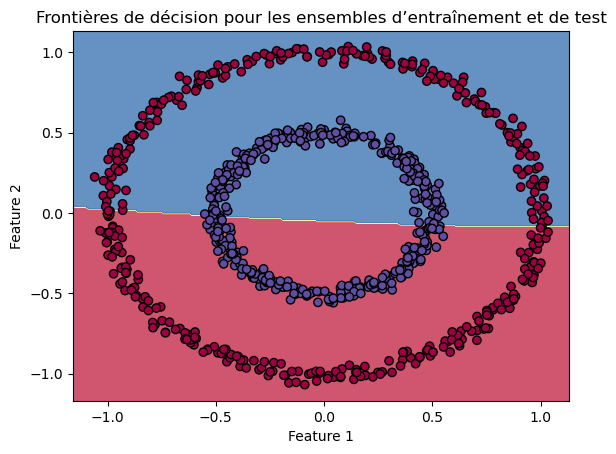

In [9]:
visualize(model, X_train, y_train)

> Quel est le probléme de ce modéle ?

Il ne peut classifier que linéairement

> Comment am´eliorer les performances du mod`ele ? Proposer 6 techniques d’amélioration et implementer
une (ou la combinaison) des solutions proposées

* Augumenter le nombre des couches
* Augumenter le nombre des epochs (dans ce cas n'a aucun sens car il va séparer encore linéarement)
* Changer le learning rate de l'optimizer
* Changer l'optimizer ou le loss function
* Augumenter le nombre des hidden units
* Ajouter des layers non linéaires : activation layer -> c'est clair que le modéle nécessite cette solution donc on va l'implementer par l'ajout de la fonction simple Relu  ajouter une autre couche et augumenter le nombre des epochs

### augmenter le nombre d'epoch

In [10]:
model = Sequential()

model.add(Dense(5, activation="sigmoid", input_shape=(2,)))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"])

history = model.fit(
    X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/400
 1/25 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.4375 - loss: 0.8207

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4860 - loss: 0.7659 - val_accuracy: 0.5000 - val_loss: 0.7523
Epoch 2/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5024 - loss: 0.7437 - val_accuracy: 0.5000 - val_loss: 0.7397
Epoch 3/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4834 - loss: 0.7356 - val_accuracy: 0.5000 - val_loss: 0.7302
Epoch 4/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.7136 - val_accuracy: 0.5000 - val_loss: 0.7229
Epoch 5/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7177 - val_accuracy: 0.5000 - val_loss: 0.7174
Epoch 6/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4911 - loss: 0.7138 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 7/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4997 - loss: 0.7057 - val_accuracy: 0.5000 - val_loss: 0.7102
Epoch 8/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5265 - loss: 0.6986 - val_accuracy: 0.5200 - val_loss: 0.

<Axes: >

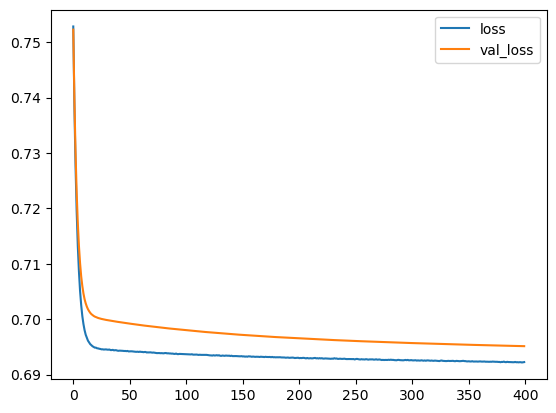

In [11]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


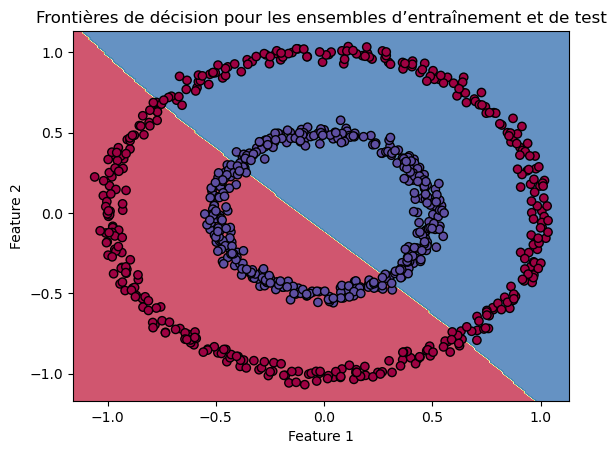

In [12]:
visualize(model, X_train, y_train)

 accuracy: 0.5450 - val_loss: 0.6922 - val_accuracy: 0.5250

### changer la fonction d'activiation

Epoch 1/100


/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5504 - loss: 0.7050 - val_accuracy: 0.4600 - val_loss: 0.7172
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4919 - loss: 0.7070 - val_accuracy: 0.4550 - val_loss: 0.7151
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5338 - loss: 0.7031 - val_accuracy: 0.4600 - val_loss: 0.7131
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4934 - loss: 0.7017 - val_accuracy: 0.4550 - val_loss: 0.7111
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5181 - loss: 0.6984 - val_accuracy: 0.4350 - val_loss: 0.7093
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4992 - loss: 0.7006 - val_accuracy: 0.4050 - val_loss: 0.7076
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4470 - loss: 0.7011 - val_accuracy: 0.3750 - val_loss: 0.7059
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4396 - loss: 0.6968 - val_accuracy: 0.3600 - val_loss: 0.

<Axes: >

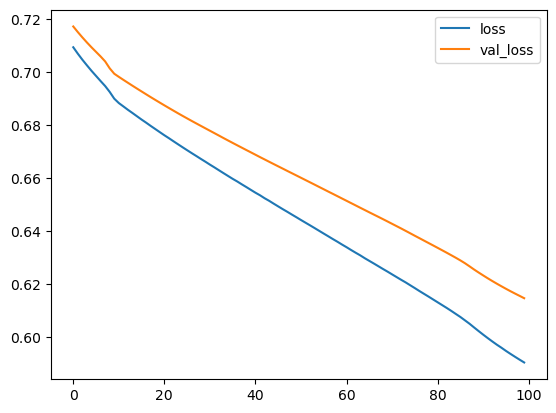

In [13]:
model_change_acti_function = Sequential()

model_change_acti_function.add(Dense(5, activation="relu", input_shape=(2,)))

model_change_acti_function.add(Dense(1, activation="sigmoid"))

model_change_acti_function.compile(
    loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"]
)

history_change_acti_function = model_change_acti_function.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)
history_change_acti_function_df = pd.DataFrame(history_change_acti_function.history)
history_change_acti_function_df.loc[:, ["loss", "val_loss"]].plot()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


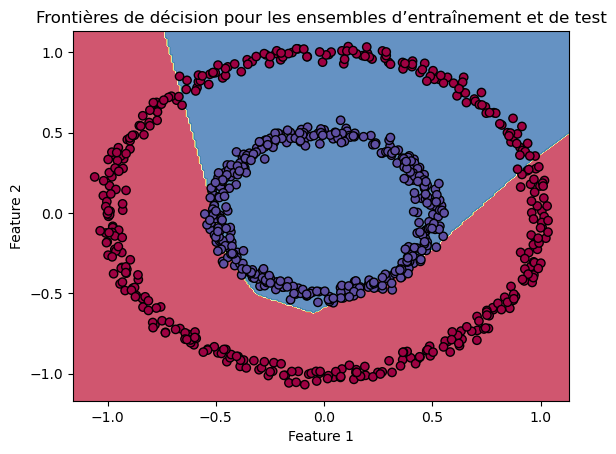

In [14]:
visualize(model_change_acti_function, X_train, y_train)

accuracy: 0.7663 - val_loss: 0.6099 - val_accuracy: 0.7450

### Changer la methode d'optimisation

Epoch 1/100


/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4872 - loss: 0.8378 - val_accuracy: 0.5000 - val_loss: 0.7901
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 0.7793 - val_accuracy: 0.5000 - val_loss: 0.7728
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5202 - loss: 0.7598 - val_accuracy: 0.5000 - val_loss: 0.7571
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - loss: 0.7801 - val_accuracy: 0.5000 - val_loss: 0.7432
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.7317 - val_accuracy: 0.5000 - val_loss: 0.7331
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 0.7444 - val_accuracy: 0.5000 - val_loss: 0.7236
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5007 - loss: 0.7314 - val_accuracy: 0.5000 - val_loss: 0.7164
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5054 - loss: 0.7221 - val_accuracy: 0.5000 - val_loss: 0.

<Axes: >

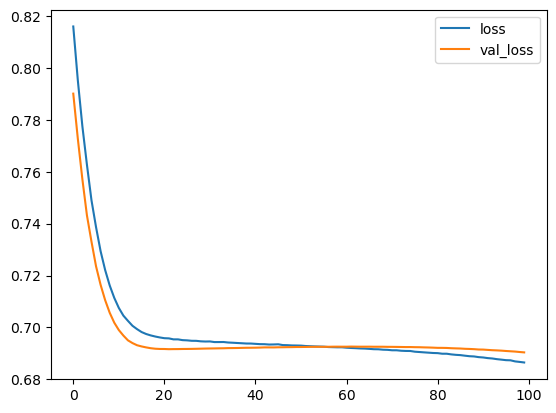

In [15]:
model_change_opt = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model_change_opt.add(Dense(5, activation="sigmoid", input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model_change_opt.add(Dense(1, activation="sigmoid"))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model_change_opt.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Entraînement du modèle
history_change_opt = model_change_opt.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)
history_change_opt_df = pd.DataFrame(history_change_opt.history)
history_change_opt_df.loc[:, ["loss", "val_loss"]].plot()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step


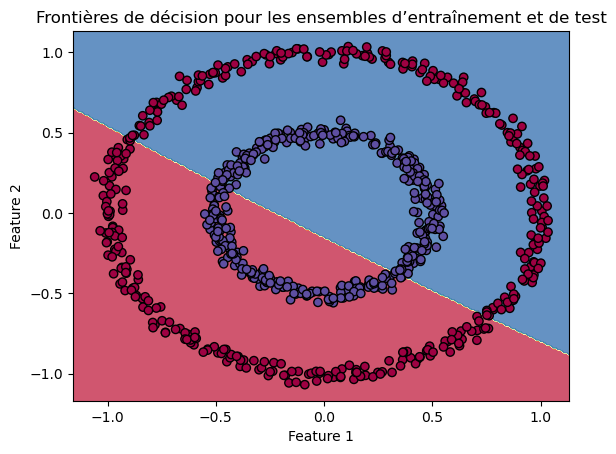

In [16]:
visualize(model_change_opt, X_train, y_train)

accuracy: 0.6862 - val_loss: 0.6861 - val_accuracy: 0.6000

### changer le nombre de neurones de la couche cachée

Epoch 1/100


/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5096 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.7251
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 0.7310 - val_accuracy: 0.5000 - val_loss: 0.7215
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4721 - loss: 0.7274 - val_accuracy: 0.4400 - val_loss: 0.7184
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4298 - loss: 0.7259 - val_accuracy: 0.4200 - val_loss: 0.7156
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3779 - loss: 0.7257 - val_accuracy: 0.4550 - val_loss: 0.7132
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4514 - loss: 0.7135 - val_accuracy: 0.4450 - val_loss: 0.7109
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3914 - loss: 0.7123 - val_accuracy: 0.3400 - val_loss: 0.7089
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2915 - loss: 0.7116 - val_accuracy: 0.2750 - val_loss: 0.

<Axes: >

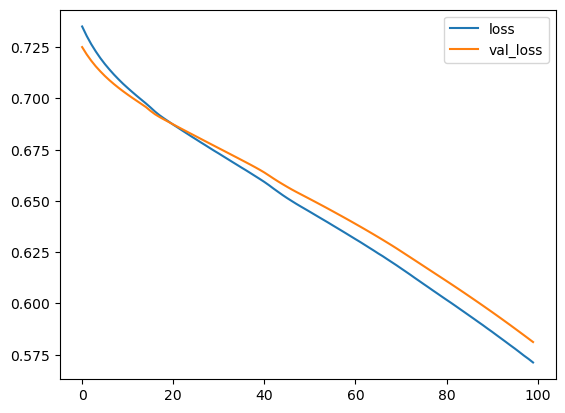

In [17]:
model_change_neurons_number = Sequential()

# Ajout d'une couche entièrement connectée avec 100 neurones cachés
model_change_neurons_number.add(Dense(20, activation="relu", input_shape=(2,)))

# Ajout de la couche de sortie avec une activation sigmoid pour la classification binaire
model_change_neurons_number.add(Dense(1, activation="sigmoid"))

# Compilation du modèle avec l'entropie croisée binaire et l'optimiseur SGD
model_change_neurons_number.compile(
    loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"]
)

# Entraînement du modèle
history_change_neurons_number = model_change_neurons_number.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)
history_change_neurons_number_df = pd.DataFrame(history_change_neurons_number.history)
history_change_neurons_number_df.loc[:, ["loss", "val_loss"]].plot()

loss: 0.5169 - accuracy: 1.0000 - val_loss: 0.5312 - val_accuracy: 1.0000

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


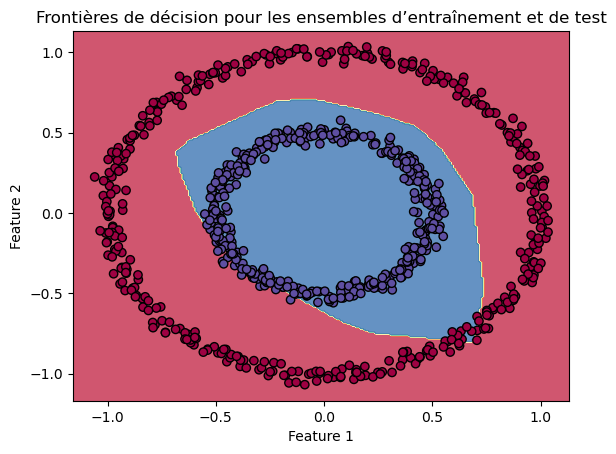

In [18]:
visualize(model_change_neurons_number, X_train, y_train)

### Tous les changement à la fois

Epoch 1/300


/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4988 - loss: 0.6805 - val_accuracy: 0.5000 - val_loss: 0.6679
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5043 - loss: 0.6647 - val_accuracy: 0.5000 - val_loss: 0.6534
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 0.6522 - val_accuracy: 0.5000 - val_loss: 0.6369
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5123 - loss: 0.6266 - val_accuracy: 0.5050 - val_loss: 0.6153
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5755 - loss: 0.6027 - val_accuracy: 0.6750 - val_loss: 0.5861
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7432 - loss: 0.5696 - val_accuracy: 0.8150 - val_loss: 0.5504
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.5334 - val_accuracy: 1.0000 - val_loss: 0.5051
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9888 - loss: 0.4866 - val_accuracy: 1.0000 - val_loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.6209e-05 - val_accuracy: 1.0000 - val_loss: 6.0486e-05
Epoch 209/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.7372e-05 - val_accuracy: 1.0000 - val_loss: 5.9508e-05
Epoch 210/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3019e-05 - val_accuracy: 1.0000 - val_loss: 5.8643e-05
Epoch 211/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2262e-05 - val_accuracy: 1.0000 - val_loss: 5.7569e-05
Epoch 212/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2525e-05 - val_accuracy: 1.0000 - val_loss: 5.6628e-05
Epoch 213/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.4988e-05 - val_accuracy: 1.0000 - val_loss: 5.5914e-05
Epoch 214/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.4647e-05 - val_accuracy: 1.0000 - val_loss: 5.4998e-05
Epoch 215/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

<Axes: >

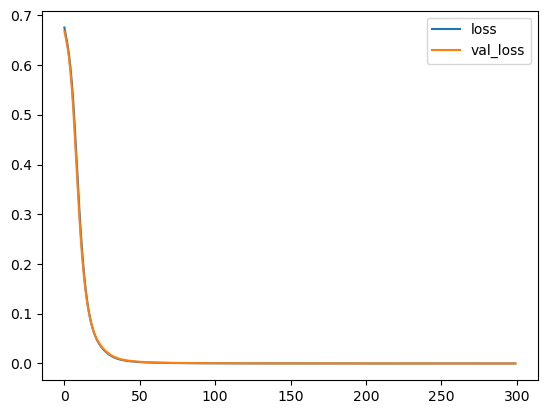

In [19]:
model_all = Sequential()

model_all.add(Dense(20, activation="relu", input_shape=(2,)))
model_all.add(Dense(20, activation="relu"))

model_all.add(Dense(1, activation="sigmoid"))

model_all.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_all = model_all.fit(
    X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test)
)
history_all_df = pd.DataFrame(history_all.history)
history_all_df.loc[:, ["loss", "val_loss"]].plot()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


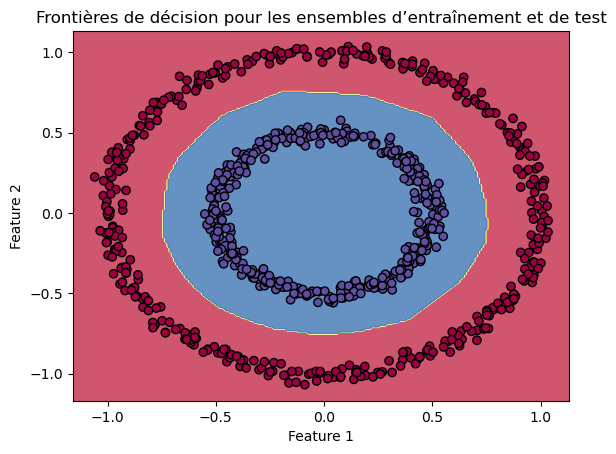

In [20]:
visualize(model_all, X_train, y_train)

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |


# Multiclassification :

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

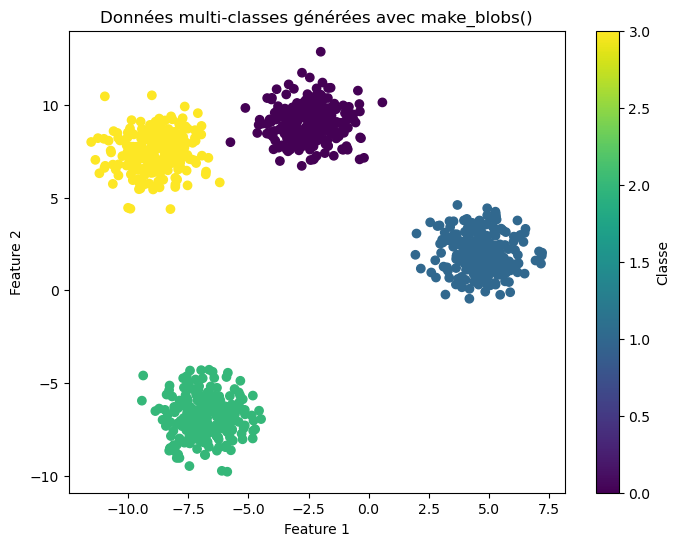

In [22]:
# Création des données avec make_blobs()
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Affichage des données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Données multi-classes générées avec make_blobs()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classe")
plt.show()

En général, lorsque les classes dans un dataset ne peuvent pas être séparées par une simple ligne droite, le problème nécessite une fonction non linéaire pour la séparation. Cela est particulièrement vrai lorsque les classes sont mélangées ou présentent une structure complexe dans l'espace des features.

Dans notre cas, puisque nous avons généré les données avec make_blobs() avec 4 classes, il est fort probable que les classes ne soient pas linéairement séparables. Cela signifie qu'une fonction non linéaire sera probablement nécessaire pour séparer efficacement les classes dans cet ensemble de données.

En conclusion, ce dataset nécessiterait probablement une fonction non linéaire pour séparer ses classes en raison de la présence de plusieurs classes et de la complexité de leur arrangement dans l'espace des features.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


## Une architecture basée sur FCNN

In [24]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model_multiclass = Sequential()

model_multiclass.add(Dense(20, activation="relu", input_shape=(2,)))


model_multiclass.add(Dense(20, activation="relu"))

model_multiclass.add(Dense(4, activation="softmax"))


model_multiclass.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

history_multiclass = model_multiclass.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)

Epoch 1/100


/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2378 - loss: 2.0626 - val_accuracy: 0.2450 - val_loss: 1.3002
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3307 - loss: 1.1434 - val_accuracy: 0.7350 - val_loss: 0.8688
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.8229 - val_accuracy: 0.7350 - val_loss: 0.6410
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.5609 - val_accuracy: 0.7350 - val_loss: 0.5226
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7322 - loss: 0.4938 - val_accuracy: 0.7350 - val_loss: 0.4413
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.4080 - val_accuracy: 0.7550 - val_loss: 0.3575
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.3154 - val_accuracy: 1.0000 - val_loss: 0.2692
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.2442 - val_accuracy: 1.0000 - val_loss: 0.

2024-06-16 21:10:07.929924: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34658880 exceeds 10% of free system memory.
2024-06-16 21:10:07.998249: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34658880 exceeds 10% of free system memory.
2024-06-16 21:10:08.042382: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34658880 exceeds 10% of free system memory.
2024-06-16 21:10:08.057049: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34658880 exceeds 10% of free system memory.
2024-06-16 21:10:08.109763: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34658880 exceeds 10% of free system memory.


135387/135387 ━━━━━━━━━━━━━━━━━━━━ 139s 1ms/step


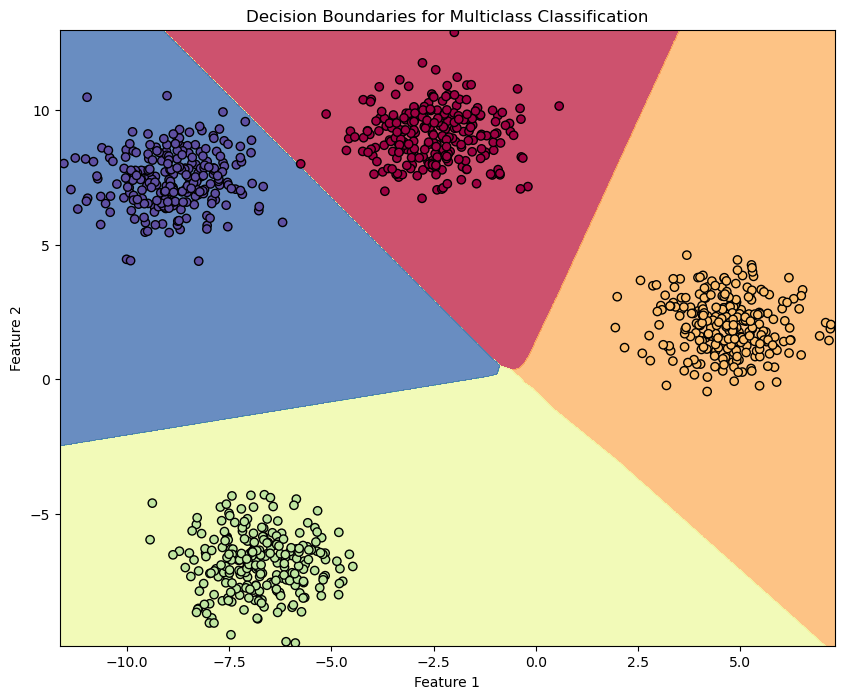

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate meshgrid for decision boundary plotting
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class probabilities for each point in meshgrid
Z = model_multiclass.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot decision boundaries with different background colors for each class
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Plot the dataset with different colors for each class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries for Multiclass Classification")
plt.show()

> Accuracy:
Accuracy measures the proportion of correctly classified instances among all instances. An accuracy of 1.0 means that all instances in the test set were classified correctly by the model.

> Precision:
Precision measures the proportion of instances predicted as positive that are actually positive. A precision of 1.0 means that all instances predicted as positive were indeed positive, and there were no false positives.

> Recall:
Recall measures the proportion of actual positive instances that were correctly identified by the model. A recall of 1.0 means that the model correctly identified all positive instances in the test set, and there were no false negatives.

> F1 Score:
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when classes are imbalanced. An F1 score of 1.0 indicates perfect precision and recall balance.

In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

y_test_multiclass = np.argmax(y_test, axis=1)
y_pred = model_multiclass.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_multiclass, y_pred)
precision = precision_score(y_test_multiclass, y_pred, average="weighted")
recall = recall_score(y_test_multiclass, y_pred, average="weighted")
f1 = f1_score(y_test_multiclass, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test_multiclass, y_pred)
class_report = classification_report(y_test_multiclass, y_pred)

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)
print("Confusion Matrix :\n", conf_matrix)
print("Classification Report :\n", class_report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0
Confusion Matrix :
 [[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Augmenter la dataset

/home/azizb/miniconda3/envs/data-science/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


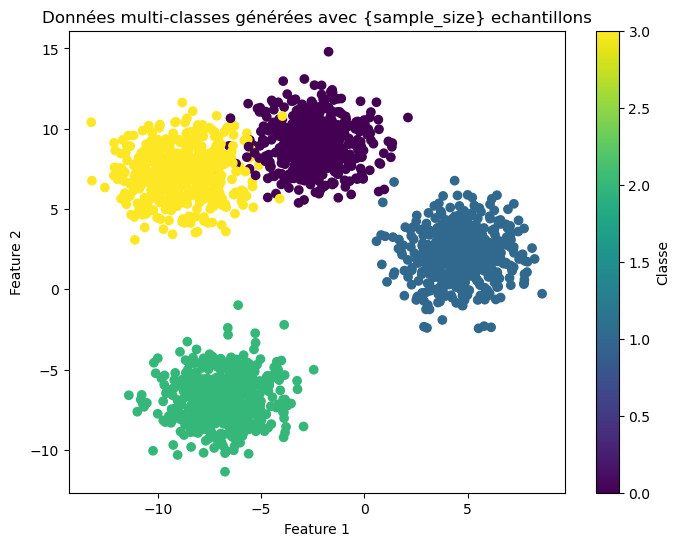

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


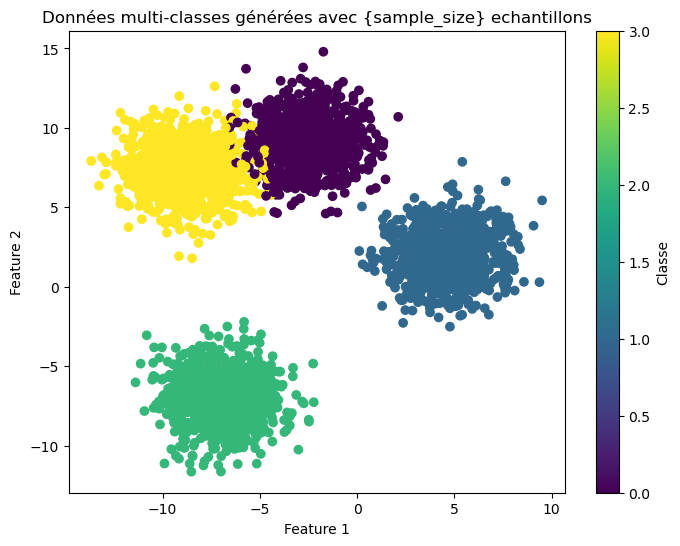

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


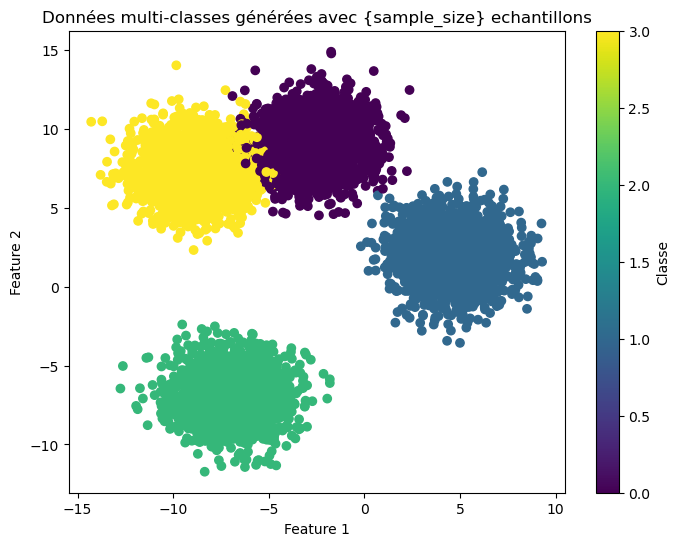

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


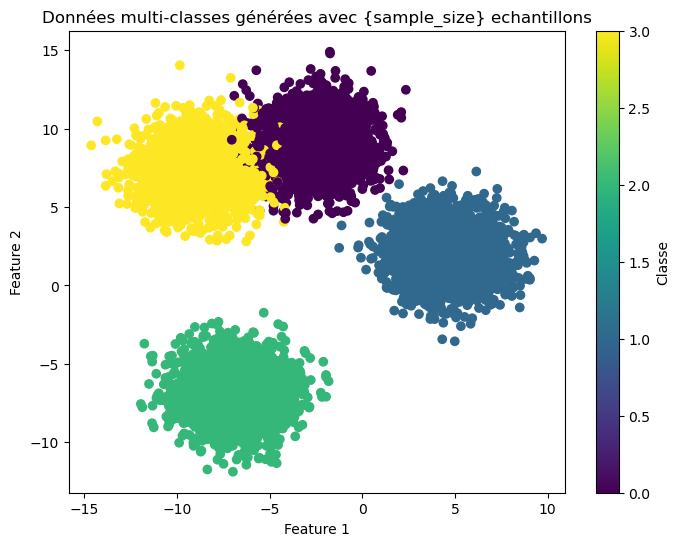

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


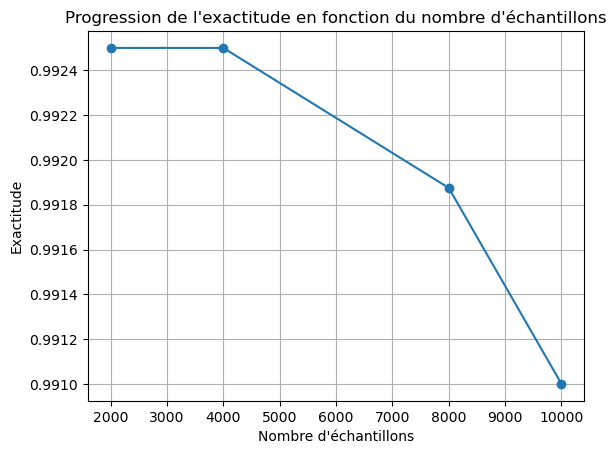

In [27]:
# Définir une plage de valeurs pour le nombre d'échantillons
sample_sizes = [2000, 4000, 8000, 10000]

# Liste pour stocker les valeurs d'exactitude
accuracies = []

# Modèle FCNN
model = Sequential()
model.add(Dense(20, activation="relu", input_shape=(2,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Génération et entraînement pour chaque taille de dataset
for sample_size in sample_sizes:
    # Générer le dataset
    X, y = make_blobs(
        n_samples=sample_size, n_features=2, centers=4, cluster_std=1.5, random_state=42
    )
    # Affichage des données
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
    plt.title("Données multi-classes générées avec {sample_size} echantillons")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Classe")
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Entraîner le modèle
    model.fit(X_train, to_categorical(y_train, 4), epochs=100, verbose=0)

    # Prédire et calculer l'exactitude
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Afficher la courbe de progression de l'exactitude en fonction du nombre d'échantillons
plt.plot(sample_sizes, accuracies, marker="o")
plt.title("Progression de l'exactitude en fonction du nombre d'échantillons")
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Exactitude")
plt.grid(True)
plt.show()